In [33]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt

#### 1. 测试分布效果
##### 1.1 测试0-1000 的分布效果

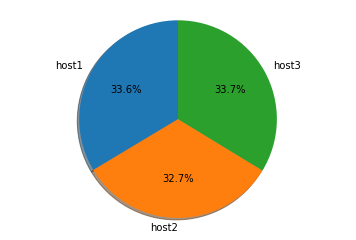

In [6]:
%run demo_jump.py

##### 1.2 测试0-1000 的分布效果

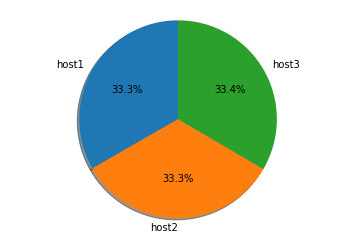

In [7]:
# 10000
%run demo_jump.py

#### 2.测试一致性

In [1]:
import jump
import binascii

In [19]:
hosts = [
    "host1",
    "host2",
    "host3",
]

In [20]:
# 正常情况
key_host = []
for i in range(3):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM3') & 0xffffffff, len(hosts))
    key_host.append(host)
print("host:", key_host)

host: [2, 2, 2]


In [21]:
# host3 失联
print("del host3")
hosts = hosts[:2]
print("host:", hosts)
key_host = []
for i in range(3):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM3') & 0xffffffff, len(hosts))
    key_host.append(host)
key_host

del host3
host: ['host1', 'host2']


[1, 1, 1]

In [24]:
# host3 重新链接
print("add host3")
hosts = [
    "host1",
    "host2",
    "host3",
]
print("host:", hosts)
key_host = []
for i in range(3):
    host = jump.hash(binascii.crc32(b'/b/apk/Y29tLm1vYmlsZS5sZWdlbmRzXzExNTIxMzMxX2U4ZGIzOTM3') & 0xffffffff, len(hosts))
    key_host.append(host)
key_host

add host3
host: ['host1', 'host2', 'host3']


[2, 2, 2]

#### 3. 测试转移分布

In [26]:
def show_pie(labels, sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [28]:
def pie_host(hosts=[], nums=10):
    data_map = {}
    for i in range(nums):
        ret = jump.hash(i, len(hosts))
        key = hostMap.get("{}".format(ret), "default")
        data_map[key] = 1 + data_map.get(key, 0)

    labels = [key for key in data_map.keys()]
    sizes = [v for v in data_map.values()]
    show_pie(labels=labels, sizes=sizes)

In [30]:
hosts = [
    "host1",
    "host2",
    "host3",
    "host4",
    "host5",
    "host6",
    "host7",
    "host8",
    "host9",
    "host10",
]
hostMap = {"{}".format(i): hosts[i] for i in range(len(hosts))}

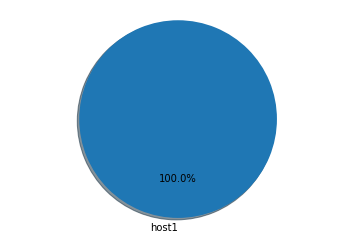

In [46]:
pie_host(hosts=hosts[:1], nums=1000)

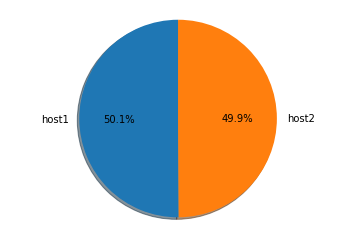

In [47]:
pie_host(hosts=hosts[:2], nums=1000)

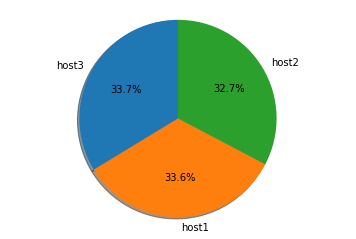

In [48]:
pie_host(hosts=hosts[:3], nums=1000)

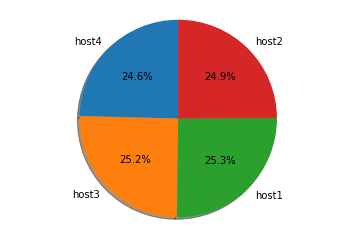

In [49]:
pie_host(hosts=hosts[:4], nums=1000)

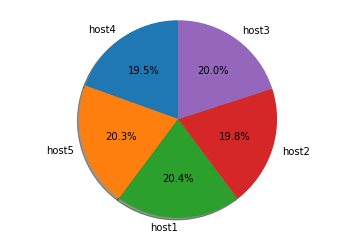

In [50]:
pie_host(hosts=hosts[:5], nums=1000)

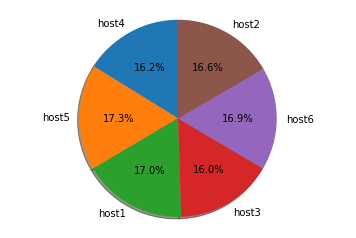

In [51]:
pie_host(hosts=hosts[:6], nums=1000)

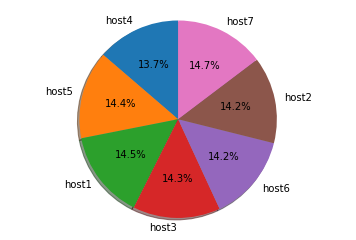

In [52]:
pie_host(hosts=hosts[:7], nums=1000)

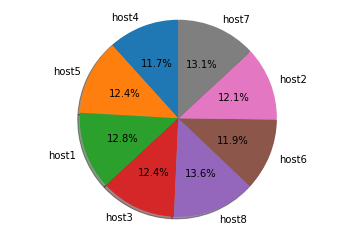

In [53]:
pie_host(hosts=hosts[:8], nums=1000)

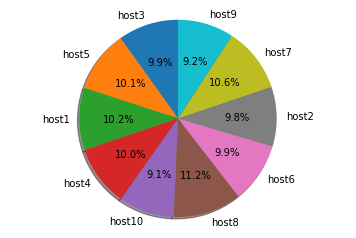

In [54]:
pie_host(hosts=hosts[:10], nums=1000)